# Project Description
This notebook will demonstrate different machine learning models for classification on non linear data. I will explain what the problem is and what we are trying to do and different techniques and how to do it. In this notebook we have some non linear data where there are two categories that are not linearly separable that we are trying to classify. This notebook will show different classification algorithms (logistic regression, k nearest neighbors, decision trees and random forests) to analyse their performance and see how well they solve the problem. I will explain a little bit about what the model is doing, how they work and their limitations. In the end the notebook will also explain what each result means and if they are any good. Lastly, I will also explain which algorithms worked best to solve this problem. 

This notebook requires some basic understanding of machine learning algorithms. However I will be going over each algorithm and give a simple explanation about how they work. This notebook is also written in python so some basic understanding of python would be helpful but there are also comments of what everything is doing as well. 

# Imports

In [33]:
from matplotlib.colors import ListedColormap # for grgphing decision boundaries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Loading Data
The data comes from the other notebook in this directory `make_dataset`. I created the dataset using sklearn and using the make moons function with a little bit of noise (more overlaps in data). The data is then stored in the `data2` folder. Originally I had a make moons dataset with no noise so using all these algorithms on the data was a bit boring because everything worked well. That data can be found in `data`. If you are interested in seeing more about how the data was created check out the `make_dataset` notebook. 

In [34]:
# location of the data
! ls data2

X_test.csv  X_train.csv y_test.csv  y_train.csv


In [35]:
data_folder = 'data2'

In [36]:
X_train = pd.read_csv(f'./{data_folder}/X_train.csv')
y_train = pd.read_csv(f'./{data_folder}/y_train.csv')
X_test = pd.read_csv(f'./{data_folder}/X_test.csv')
y_test = pd.read_csv(f'./{data_folder}/y_test.csv')

In [37]:
# here is the X_train data containg our two variables x_1 and x_2
X_train

,x_1,x_2
0,1.543795,-0.242409
1,0.284362,-0.289493
2,-0.818905,0.053129
3,0.991271,0.331274
4,1.181948,0.330166
...,...,...
1120,-0.159182,0.768414
1121,0.533185,0.754607
1122,1.120973,-0.339045
1123,0.803148,0.695908


# Graphing the Data
Down here is some code to graph the data. First I had to split the data by category so that there can be a clear visual difference between the categories. In the graph there are two clusters, one of them in red and the other in blue. There can also be seen that they overlap so the color coding was very helpful. From the graph we can see what data looks like. Clearly this is not linear data and it's not linearly separable. This will be what we are trying to do which is testing machine learning models for classification on this non linear data. 

Below that graphed data there is also another graphing function (`graph_boundary`). This function will be used later to graph the data as well but with a decision boundary. The decision boundary will be used to see how the model is predicting and see if there is any overfitting going on or if it mis-classifies something.

In [38]:
def seperate_categories(df):
    """function to seperate dataframes by category"""
    category_zero = df.loc[df['output'] == 0]
    category_one = df.loc[df['output'] == 1]
    return category_zero, category_one

In [39]:
X_df = pd.DataFrame(data=X_train)
y_df = pd.DataFrame(data=y_train)
dataframes = [X_df, y_df]
result = pd.concat(dataframes, axis=1)
class_one, class_two = seperate_categories(result)

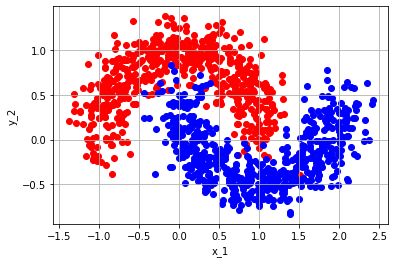

In [40]:
%matplotlib inline 
plt.scatter(class_one['x_1'], class_one['x_2'], color='r')
plt.scatter(class_two['x_1'], class_two['x_2'], color='b')
plt.xlabel('x_1')
plt.ylabel('y_2')
plt.grid(True)
plt.show();

In [41]:
def graph_boundary(model, class_one, class_two):
    # colors for graphing decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading="auto")
    # plot the data by categories 
    plt.scatter(class_one['x_1'], class_one['x_2'], color='r')
    plt.scatter(class_two['x_1'], class_two['x_2'], color='b')
    # set the x and y limits of the graph
    plt.xlim([min(X_train['x_1']), max(X_train['x_1'])])
    plt.ylim([min(X_train['x_2']), max(X_train['x_2'])])
    plt.show()

In [42]:
# reformat data to numpy array so we can use it more easily
y_train = y_train['output']

# Using Logistic Regression
- describe what type of algorithm it is (classification)
The first classification algorithm I'm starting with is logistic regression. 

$ sigmoid(z)= \frac{1}{1+e^{-z}} $ where $z=mx+b$ 
- describe overview of how it works 
- describe logic of how it works (how is it useful)
- describe training and prediction complexity
- limitations
Logistic regression has some limitations that I will talk more about later as I analyze the results of the algorithm.

In [43]:
# import model
from sklearn.linear_model import LogisticRegression 

In [44]:
# create the model 
logistic_regression = LogisticRegression()

In [45]:
 # train model on the training data
logistic_regression = logistic_regression.fit(X_train, y_train)

Here are the train and the test accuracy. We can see that the scores are fairly high. Although the test score is the lowest of these algorithms it is still a pretty high score. It gets a good number of the examples correctly but we can always improve and get a higher score. To understand more about the model and what it's doing there is a graph of a confusion matrix and a graph of the decision boundary below. This will help us understand how the model is predicting and how it's making its decisions. I will also explain what a confusion matrix and decision boundary is. 

In [46]:
# get train accuracy
f'Training Accuracy: {logistic_regression.score(X_train, y_train)}'

'Training Accuracy: 0.88'

In [47]:
# get test accuracy
f'Test Accuracy: {logistic_regression.score(X_test, y_test) }'

'Test Accuracy: 0.8746666666666667'

This is a confusion matrix. A confusion matrix can also show us more into how our model is working and what it's doing. As we can see this validates that our train and test scores are alright and that the model is performing pretty well. From this matrix we can tell it performs well because for example if we look at the `true label` axis for the class `0` we see that the predicted label for `zero` (the correct label) is so much higher for `1` . This means that the model predicted the true label correctly `170` times and predicted the false label `27` times. The same can be said for the class `1` as well.

In [48]:
from sklearn.metrics import plot_confusion_matrix

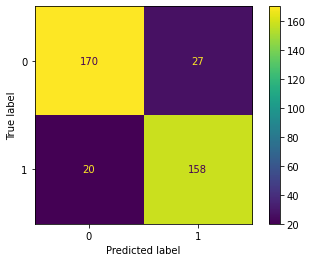

In [49]:
plot_confusion_matrix(logistic_regression, X_test, y_test)  
plt.show() 

Lastly, here is a graph of the decision boundary. The decision boundary is the boundary that shows how our model is classifying data. For example here is the graph of the decision boundary for logistic regression for our problem. As we can see there is a line running through both categories/clusters. That line is what the model uses to separate and predict categories. Meaning if we want to classify a new example and it's in the blue section/below the line it will belong to that class.

We can see that the model gets the majority of the data correctly but fails to classify the middle examples. As mentioned earlier we can also see that the logistic regression decision boundary is just a line. This is because logistic regression is best for solving linearly separable problems. What this means is that if we have some data where there are two categories that we can separate and classify them by drawing a line through them. That's why the boundary here is just a line. However because this is non linear data it can't do any better than that. This is one of the limitations of logistic regression. 

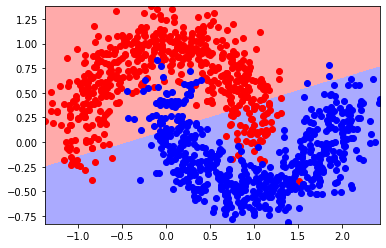

In [50]:
graph_boundary(logistic_regression, class_one, class_two)

The limitations are that it can't learn the data if the data does not have a linear relationship. This can also be seen has logistic regression having a [bias error](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). Algorithms that have a bias error are algorithms fail to learn the relationships between their datas inputs and outputs (usually underfit) and thats what logistic regression is doing here. Altough it gets a good amount of examples correct it fails to learn the edges where the data start to overlap but not fully overlap. Another reason for logistic regression having a bias error is for logistic regression making assumptions of the data. It assumes the data will be linear data which this data is not. But it did perform a lot better than I expected. 

# Using KNN
Now we will be using another classification algorithm which is knn (k nearest neighbors). The way this algorithm works is that if we want to classify something we find some odd number $k$. This odd number is how many nearby examples we will check. For example if our $k=3$ we will check for the three closests neighbors of our example we are trying to classify. The majority category in those three neighbors is what the algorithm predicts. One thing to note is that we check how close the neighbors are by taking the distance from one example to our example. A common distance is the Euclidean distance where distance equals $ d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2} $ snd $ (x_1,y_1) $ are one point and $ (x_2,y_2) $ is another point. This function returns the distance between those two points. This is how we find what is closest to our example we are trying to classify. Here is a visual example

In [51]:
# import model
from sklearn.neighbors import KNeighborsClassifier

A big part of `k nearest neighbors` is the hyperparameter $k$. Here we have our $k$ equal to seven. As mentioned earlier this is the number of neighbors the algorithm will check to make a prediction. There are many ways we can choose our $k$ one way is just manually trying a bunch of different values and checking what gives us better outcomes. This of course can work but is not a good solution to manualy check because there can be many hyper parameters meaning many combonations. Another way is making some decisions on what would be a good value. For example I knew the number needed to be odd and I knew that if I chose a small odd number like three I could possibly risk overfitting. Here is an example using a number I thought would be a good fit. 

In [52]:
# create model with 7 neighbors to define
manual_knn = KNeighborsClassifier(n_neighbors=7)

In [53]:
# train the model
manual_knn = manual_knn.fit(X_train, y_train)

In [54]:
# get training accuracy
f'Training Accuracy: {manual_knn.fit(X_train, y_train).score(X_train, y_train)}'

'Training Accuracy: 0.9795555555555555'

In [55]:
# get test accuracy
f'Test Accuracy: {manual_knn.score(X_test, y_test)}'

'Test Accuracy: 0.9733333333333334'

Looking at the confusion matrix for this algorithm we can see that it also performs really well. We know it performs better because as I explained earlier if we look at the `true label` axis for the class $0$ we see that the predicted label for zero (the correct label) is so much higher for class $1$. It's actually perfect; it doesn't even predict class $1$ at all. Same for the other class. The test score is higher and the matrix shows the algorithm gets the correct label most of the times. From this we know this algorithm works well.

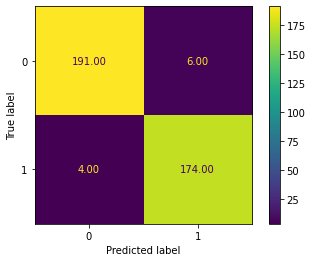

In [56]:
plot_confusion_matrix(manual_knn, X_test, y_test, values_format = '.2f')
plt.show()

The desicion boundary here is very different compared to the logistic regression one. While the logistic regression one was just a straight line through the category the decision boundary for knn circles around both categories seperating them. We can see that it doesn't perfectly classify every example. This can be seen by some blue points in the red boundary and some red points in the blue boundary. Of course this is also a good thing because if it perfectly categories everything then that means that there is some overfitting. If we overfit that means we are memorizing the training data and our model will fail on new examples.

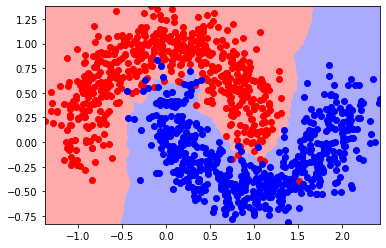

In [57]:
graph_boundary(manual_knn, class_one, class_two)

In the example above I manually set the hyperparameter $k=7$. Another way of getting a hyperparameter is using hyperparameter optimization which is using machine learning to learn which parameters are best for our algorithm. An example of this is [linear regression with gradient desecent](https://github.com/GaelGil/notebooks/blob/master/linear_regression/gradient_descent.ipynb). In gradient descent we take the gradient of the sum of the squared errors to find the best parameters for our algorithm. Here is an example of knn using a method of hyper parameter optimization called grid search. In grid search we provide some values we want to try and

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}, return_train_score=False)

In [60]:
# warning: this cell takes a long time to run
grid_search_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [61]:
# turn results into dataframe
grid_search_knn_results = pd.DataFrame(grid_search_knn.cv_results_) 

From this dataframe here we can tell that any parameter would be good. Some parameters would give us a slightly better test score but overall they are all good and very similar. A reason for all these parameters being good is because if we take a look at the data graphed. A majority of the data is fairly close to each other meaning the closest neighbor will always be the correct class. However in the edges where the data overlaps this won't always be true. We can see that some red dots are directly next to the majority blue meaning its closest neighbor is not the category it belongs to.

In [62]:
# display grid search results
grid_search_knn_results[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.967111
1,3,0.973333
2,5,0.978667
3,7,0.978667
4,9,0.977778
5,11,0.976889


Here is a graph of how the test score changes as our hyper parameter $k$ increases. We can see that the higher the value is the better the test score is. The biggest visual jump is from $k=1$ to $k=3$.  After that the score increases but then starts to lower. This could possibly because at those values the model starts to overfit. Overall we can see that our manual chosen hyperparameter $k=7$ was a good choce. 

One thing to note however is that this graph can be misleading. Although we see that as $k$ changes so does `mean_test_score` the change is so small that if we graphed it with whole numbers they would be in a line. But because we are zoomed in it seems as though there is a drastic change. The change is so small that if we take a look at the numbers they are all pretty much the same  $0.967111, 0.973333, 0.978667, 0.978667$. To better visualize this there is a comment below that you can remove that will plot the data if we were not zoomed in to better understand how small the change is. 

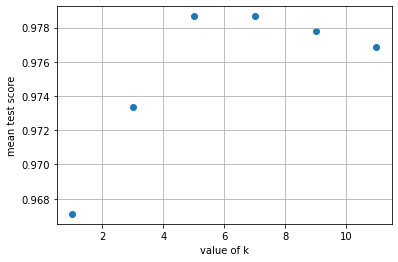

In [63]:
%matplotlib inline 
plt.scatter(grid_search_knn_results['param_n_neighbors'], grid_search_knn_results['mean_test_score'])
plt.xlabel('value of k')
plt.ylabel('mean test score')
plt.grid(True)
# remove the comment below to see how close these values are
# plt.ylim(0, 1.5) 
plt.show();

# Using Decision Trees
Another great classification algorithm is decision trees. The way this model works is the model takes in some data. The model then takes each example and splits them all into binary categories. It stops until there are no more categories we can split the examples into. To simplify it the model creates a bunch of if statements that each example fits into. When we want to classify a new example we just put the example through our tree and it gets fit into one of these statements until it can't go further. 

In [64]:
# import model
from sklearn import tree

In [65]:
tree_clf = tree.DecisionTreeClassifier()

In [66]:
tree_clf = tree_clf.fit(X_train, y_train)

In [67]:
f'Training Accuracy: {tree_clf.score(X_train, y_train)}'

'Training Accuracy: 1.0'

In [68]:
f'Test Accuracy: {tree_clf.score(X_test, y_test)}'

'Test Accuracy: 0.9706666666666667'

As we can see the decision boundary here has no curves but rather straight lines that take turns left or right. This makes sense of course because as I mentioned earlier our algorithm breaks down everything into binary categories meaning it can go one way or the other and there's no in between. From this graph we can also tell that the model is overfitting. We know this because at around $y=-.25$ and through $x=0.5$ and $x=1.5$ there is a thin red line trying to catch the red dots that are in the blue boundary. 

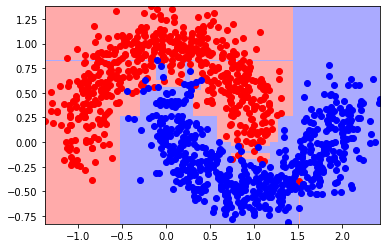

In [69]:
graph_boundary(tree_clf, class_one, class_two)

# Using Random Forests
The way random forests works is by.

In [70]:
# import model
from sklearn.ensemble import RandomForestClassifier

Because random forests has some hyper parameters I am going to be using grid search once again to find the best values for those hyperparameters `(hyperparameter optimization)`. Once I have the results we can analyze them and see what will be best for our model.

In [71]:
grid_search_random_forest = GridSearchCV(RandomForestClassifier(),{
    'max_depth': [1, 2, 3, 4, 5, 6],
    'random_state': [0, 1]
}, return_train_score=False)

In [72]:
# perform grid search to find best hyperparamters
grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'random_state': [0, 1]})

In [73]:
# turn the results into a dataframe
grid_search_random_forest_results = pd.DataFrame(grid_search_random_forest.cv_results_)

Here we have the results displayed. We can see that as the `max_depth` increases the `mean_test_score` does as well. The hyperparameter `random_state` however doesn't seem to have such a drastic change to our `mean_test_score`. For example we can see on `row 2` that when our `max_depth` is equal to $2$ and our `random_state` is $0$ it performs slightly better than that of `row 3` where the `max_depth` is the same but our `random_state` is equal to $1$. For this reason I will be using a random state of $0$. If this was confusing I have a visual example below explaining how the `mean_test_score` is affected by the value of our hyperparameters.

In [74]:
# display the results
grid_search_random_forest_results[['param_max_depth', 'param_random_state', 'mean_test_score']]

,param_max_depth,param_random_state,mean_test_score
0,1,0,0.873778
1,1,1,0.887111
2,2,0,0.919111
3,2,1,0.915556
4,3,0,0.923556
5,3,1,0.922667
6,4,0,0.926222
7,4,1,0.929778
8,5,0,0.968889
9,5,1,0.967111


Here are the results above but in a graph. There are two points at each max value because each is being tested with `random_state` true or false. However we can see that the higher the `max_depth` is the better the `mean_test_score`. From the results and this graph we can tell that the best value for our hyperparameter `max_depth` is $6$ and for our other hyperparameter `random_state` the best value is $0$. I will now use these values for our model.

Another reminder that this graph below is misleading. All these scores are very close to each other with only very minor differences. There is a comment below you can removew to see how close these scores are.

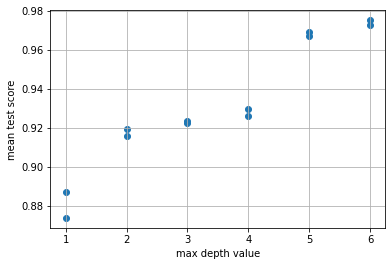

In [75]:
%matplotlib inline 
plt.scatter(grid_search_random_forest_results['param_max_depth'], grid_search_random_forest_results['mean_test_score'])
plt.xlabel('max depth value')
plt.ylabel('mean test score')
plt.grid(True)
# remove the comment below to see how close these values are
# plt.ylim(0, 1.5) 
plt.show();

In [76]:
# use the hyperparameter that we found using grid search
random_forest_clf = RandomForestClassifier(max_depth=6, random_state=0)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

These scores are relly good. Lastly we'll take a look at the decision boundary.`

In [77]:
f'Training Accuracy: {random_forest_clf.score(X_train, y_train)}'

'Training Accuracy: 0.984'

In [78]:
f'Test Accuracy: {random_forest_clf.score(X_test, y_test)}'

'Test Accuracy: 0.976'

From graphing the decision boundary we can see that this model performs well. We can see that unlike decision trees this model does not overfit by trying to get everything correctly. By that I mean that the decision boundary doesn't overstep into the red points to classify one blue point. 

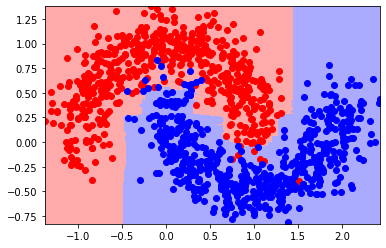

In [79]:
graph_boundary(random_forest_clf, class_one, class_two)

# Conclusion

In the end altough logistic regression performed better than I had initually thought because of its bias error and its limitations it is not a good algorithm for this data. It's bias error does't allow it to learn non linearly seperable data which is what we are specifically trying to do and because of that limitation it is not so useful here. Even though its score is pretty high we know we can do a lot better. 

K Nearest Neighbors was a algorithm I tought would be the best performing and altought was really good it had its limitations. Because of its variance error the knn would overfit as we sawwhen we graphed the decision boundary. 

Decision trees was a algortihm that also performed well but it has a high variance error as well. We watched on the decison boundary how it overfit a the data a lot. Despite this it classified our non liearn data really well. However because of its high variance error I don't know it it would keep preforming well if the data was more noisy (more overlap in the classes). I think overall it's good at classifying non linear data but if the data is very noisy thats where I could see it possibly failing a more and overfitting. 

Lastly random forests. Going into this project I wasn't too familiar with this algorithm. From what I read about how it is similar to decision trees I assumed it would perform well but might easily overfit or have a high variance error. I also did not know it had hyper parameters so using them twice in this notebook as cool. It also gave the opportunity to explain hyper parameters optimiation with more than hyper parameter. In the end the algorithm performed well and did not easily overfit. I think this algorithm performed the best out of all of them. This is because even tho knn did very well at the best value for $k$ it still overfit as we saw in the decisioun boundary. This did not happen in random forests it did not overfit at its best hyper parameter values. Because of this I think its the best algorithm to solve our issue. 

In conclusion all these alorithms performed well and solved our problem of classifying non linear data. Even logistic regression. All of them had their bias and variance error and of course limiations but they all did well.